# **************** Data Science & BusinessAnalytics *******************

 ![alt text](Image.png "Title")

## Task-1

## By - Manjit Kumar Singh 

### Problem statement- Predict the percentage of an student based on the no. of study hours using Linear Regression

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading and reading the dataset
df = pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#shape of the dataset
df.shape

(25, 2)

In [5]:
#info() gives us the summary of the dataframe which index dtypes and columns dtypes and non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Plot Hours vs Scores

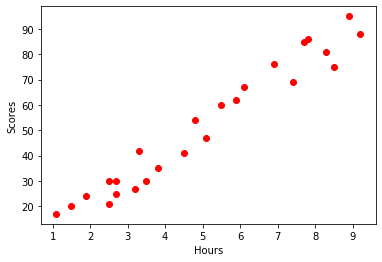

In [7]:
plt.figure()
plt.scatter(df['Hours'],df['Scores'],c='red')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

As seen from the above scatter plot there's a high positive correlation between the two variables

In [8]:
#Taking Hours as Feautures and Scores as Target Variable
X = df['Hours'].values.reshape(-1,1)
y = df['Scores'].values.reshape(-1,1) 

In [9]:
#Using the Train and Test split on the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [10]:
#here we create an instance of a linear regression() model named lr
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.intercept_

array([1.93220425])

In [12]:
#The coefficiencts
#The coefficient value represents the mean change in the response given a one unit change in the predictor
print('Coefficients: ',lr.coef_)

Coefficients:  [[9.94167834]]


#### 1 unit increase in Hours studying spend is associated with an increase of 9.94 scores

In [13]:
#Predicting off hte test values after fitting our model
y_pred = lr.predict(X_test)

In [14]:
predicted_df = pd.DataFrame({'Actual':y_test.flatten(),"Predicted":y_pred.flatten()})

## New Dataframe shows the Actual vs Predicted scores

In [15]:
predicted_df.head()

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106


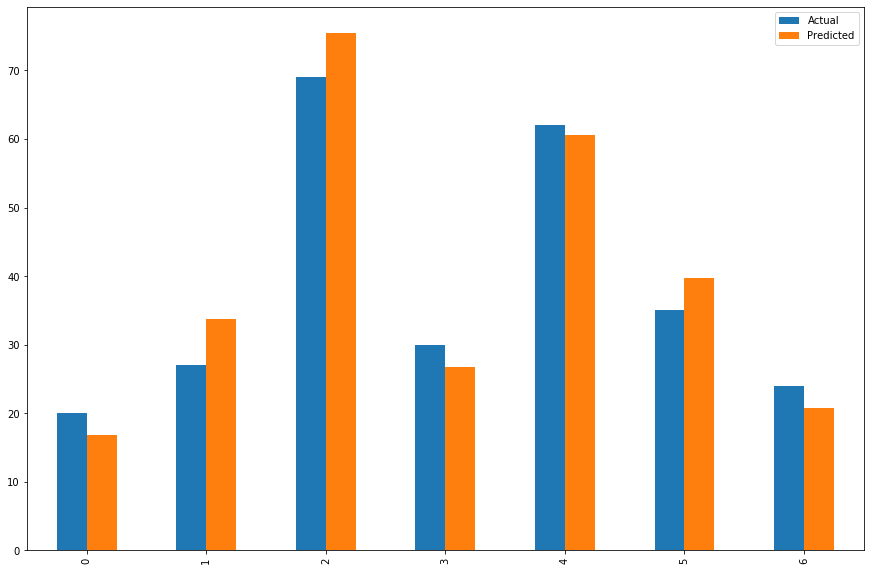

In [16]:
predicted_df.plot(kind='bar',figsize=(15,10))
plt.show()

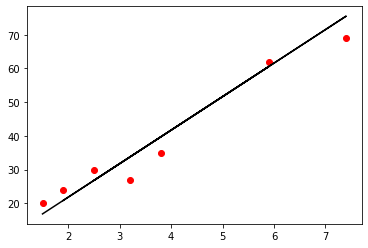

In [22]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='black') #best fit regression line
plt.show()

# Evaluating the Model


In [23]:
#mean absolute error
print("Mean absolute error :", mean_absolute_error(y_pred,y_test))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean absolute error : 4.130879918502482
MSE: 20.33292367497996
RMSE: 4.509204328368805


#### The perfect MAE should 0, which means that all the predictions matched the expected values exaclty which is not the same in our case

# Residuals

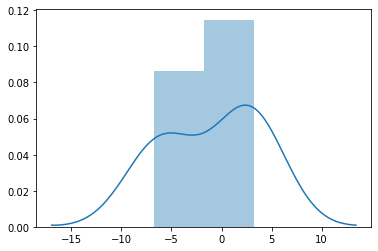

In [24]:
sns.distplot((y_test-y_pred));

In [25]:
r2_score(y_pred,y_test)

0.9491095995820088

#### Higher the R-squared ,better the model, achieving ~94% is great for this model 

# Now predicting the Scores with a 9.25 hours of study 

In [26]:
lr.predict([[9.25]])[0][0]

93.89272889341652

As we can see that a student studying for 9.25 hours can achieve percentage over 93%.

In [27]:
#Y= m*x + c---- where y is the predicted value, m is the slope ,X is the indepedant variable/feature and c is the intercept
'''In our case c = 1.93220425 and m =  9.94167834'''

'In our case c = 1.93220425 and m =  9.94167834'

In [28]:
c = 1.93220425
m = 9.94167834
x = 9.25
Y = m*x+c

In [29]:
Y

93.89272889499999

This is the case for a simple regression problem(a single x and a single y)